Skript to Visualize and Replicate Axtell 99

In [762]:
import matplotlib.pyplot as plt
import dask.dataframe as dd
import pandas as pd
import scipy.signal
import numpy as np

In [763]:
out_dir = "../results/axtell_99"

In [764]:
opttype = 1

In [925]:
run = 999

In [926]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [927]:
path_f = f"{out_dir}/res_firm_agent_run{run}_opttype{opttype}.csv.gz"

In [928]:
path_w = f"{out_dir}/res_worker_agent_run{run}_opttype{opttype}.csv.gz"

In [929]:
path_m = f"{out_dir}/res_model_agent_run{run}_opttype{opttype}.csv.gz"

In [930]:
model_dk = dd.read_csv(path_m, blocksize=None)

In [931]:
worker_dk = dd.read_csv(path_w, blocksize=None)

In [932]:
worker_df = worker_dk.groupby("t").mean().compute()

In [933]:
worker_df

,id,effort,wealth,income,tenure,preference
t,,,,,,
0,1000.0,0.470602,0.810920,0.810920,1.000,0.501897
1,1000.0,0.430818,1.660391,0.849471,1.612,0.501897
2,1000.0,0.403045,2.507984,0.847593,2.069,0.501897
3,1000.0,0.379967,3.346989,0.839005,2.354,0.501897
4,1000.0,0.367595,4.168570,0.821581,2.538,0.501897
...,...,...,...,...,...,...
995,1000.0,0.344565,775.119455,0.790462,2.836,0.501897
996,1000.0,0.345379,775.905651,0.786195,2.940,0.501897
997,1000.0,0.348472,776.702961,0.797310,2.989,0.501897


In [934]:
firm_dk = dd.read_csv(path_f, blocksize=None , dtype={
    "t": "int16",
    "id": "int32",
    "age": "int16",
    "number_employees": "int32",
    "total_effort": "float64",
    "output": "float64",
    "average_pref": "float64"}
)

In [935]:
df = model_dk.compute()

In [936]:
average_number_of_firms = df["total_firms"].mean()

In [937]:
average_number_of_firms

523.686

In [938]:
firm_number = firm_dk.groupby(firm_dk.t).t.size().mean()

In [939]:
workers_check = firm_dk.groupby("t").number_employees.sum().compute()

In [940]:
workers_check

t
0      1000
1      1000
2      1000
3      1000
4      1000
       ... 
995    1000
996    1000
997    1000
998    1000
999    1000
Name: number_employees, Length: 1000, dtype: int32

In [941]:
firm_number.compute()

523.686

In [942]:
width = 390

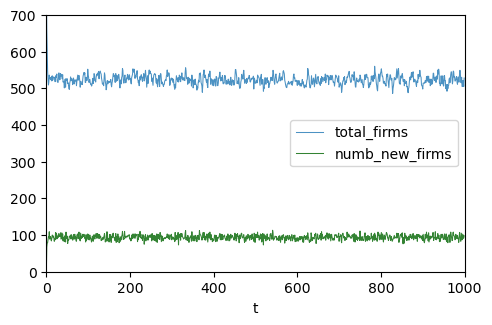

In [943]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,700])
ax.set_xlim([0,1000])
df.plot(kind="line", y = "total_firms", x="t", ax=ax, linewidth=0.75, alpha=0.8)
df.plot(kind="line", y = "numb_new_firms", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

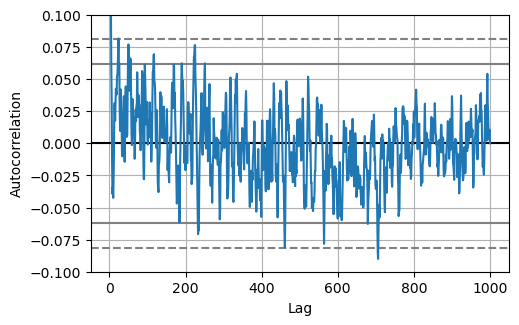

In [831]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([-0.1,0.1])
pd.plotting.autocorrelation_plot(series=df.total_firms, ax = ax)
plt.show()

In [832]:
average_firm = firm_dk.groupby(firm_dk.t).number_employees.mean().compute()

In [833]:
average_firm

t
0      1.196172
1      1.501502
2      1.715266
3      1.798561
4      1.773050
         ...   
995    1.841621
996    1.869159
997    1.904762
998    1.886792
999    1.865672
Name: number_employees, Length: 1000, dtype: float64

In [834]:
max_firm = firm_dk.groupby(firm_dk.t).number_employees.max().compute()

In [835]:
max_firm

t
0       4
1       5
2       8
3       8
4       8
       ..
995    11
996    11
997     9
998     8
999     8
Name: number_employees, Length: 1000, dtype: int32

In [836]:
print(max_firm.mean())

15.437


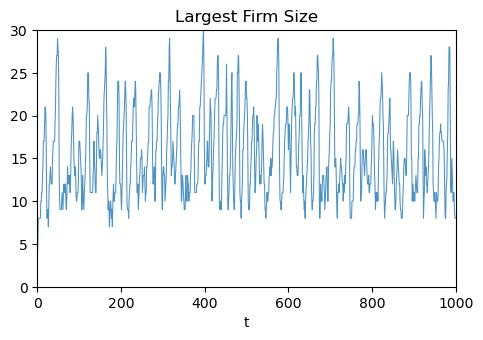

In [837]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,30])
ax.set_xlim([0,1000])
ax.set_title("Largest Firm Size")
max_firm.plot(kind="line", y = "Largest Firm Size", x="t", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

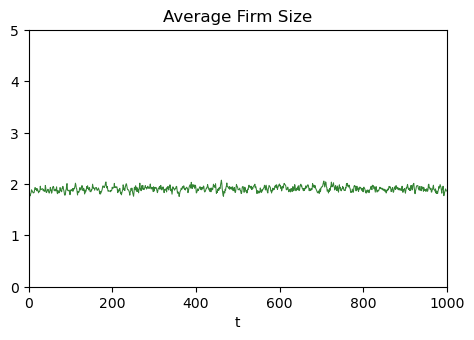

In [838]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,5])
ax.set_xlim([0,1000])
ax.set_title("Average Firm Size")
average_firm.plot(kind="line", y = "Average Firm Size", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

Effort Levels

Average effort level (from worker df)

In [839]:
worker_dk = dd.read_csv(path_w, blocksize=None)

In [840]:
avg_effort = worker_dk.groupby(worker_dk.t).effort.mean().compute()

In [841]:
avg_effort

t
0      0.471887
1      0.437599
2      0.405718
3      0.384033
4      0.377456
         ...   
995    0.363485
996    0.359890
997    0.359797
998    0.361898
999    0.362919
Name: effort, Length: 1000, dtype: float64

In [842]:
firm_dk.assign(avg_e = firm_dk.total_effort/firm_dk.number_employees).groupby(firm_dk.t).number_employees.idxmax()

Dask Series Structure:
npartitions=1
    int64
      ...
Name: number_employees, dtype: int64
Dask Name: series-groupby-idxmax-agg, 8 tasks

In [843]:
filtered_firm_dk = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]].assign(avg_e = firm_dk.total_effort/firm_dk.number_employees)

C:\Users\41782\AppData\Local\Temp\ipykernel_11168\188437644.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .transform(func)
  After:  .transform(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .transform(func, meta=('x', 'f8'))            for series result
  filtered_firm_dk = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]].assign(avg_e = firm_dk.total_effort/firm_dk.number_employees)


In [844]:
avg_effort_maxfirm = filtered_firm_dk.groupby("t").avg_e.mean().compute()

In [845]:
avg_effort_maxfirm

t
0      0.206972
1      0.204173
2      0.246782
3      0.246782
4      0.383254
         ...   
995    0.411085
996    0.326828
997    0.206681
998    0.385349
999    0.369862
Name: avg_e, Length: 1000, dtype: float64

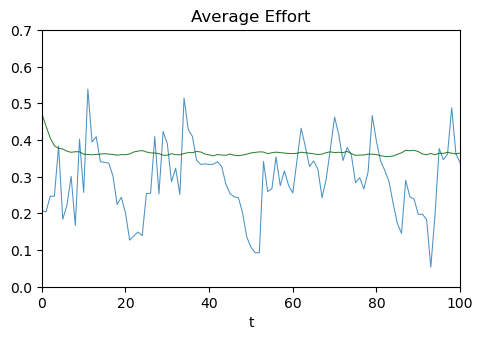

In [846]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,0.7])
ax.set_xlim([0,100])
ax.set_title("Average Effort")
avg_effort_maxfirm.plot(kind="line", y = "avg_e", x="t", ax=ax, linewidth=0.75, alpha=0.8)
avg_effort.plot(kind="line", y = "effort", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

Output Total and Largest Firm

In [847]:
filtered_firm_dk2 = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]]

C:\Users\41782\AppData\Local\Temp\ipykernel_11168\2543161246.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .transform(func)
  After:  .transform(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .transform(func, meta=('x', 'f8'))            for series result
  filtered_firm_dk2 = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]]


In [848]:
output_max_firm = filtered_firm_dk2.groupby("t").output.max().compute()

In [849]:
output_max_firm

t
0       1.513286
1       2.134118
2       5.871938
3       5.871938
4      12.466590
         ...    
995    24.969787
996    16.519950
997     9.035050
998    21.620048
999    21.579684
Name: output, Length: 1000, dtype: float64

In [850]:
output_total = firm_dk.groupby("t").output.sum().compute()

In [851]:
output_total

t
0      811.398039
1      878.994661
2      860.970989
3      832.534044
4      804.287381
          ...    
995    793.885512
996    780.066639
997    793.992681
998    786.934140
999    778.929593
Name: output, Length: 1000, dtype: float64

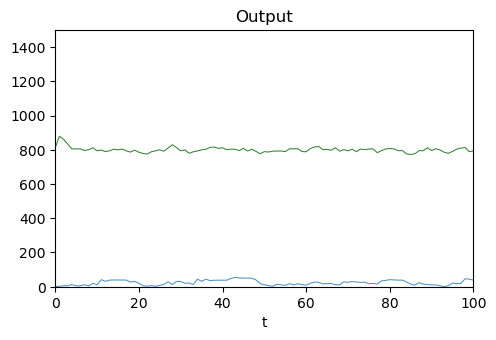

In [852]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,1500])
ax.set_xlim([0,100])
ax.set_title("Output")
output_total.plot(kind="line", y = "output", x="t", ax=ax, linewidth=0.75, alpha=0.8, color="darkgreen")
output_max_firm.plot(kind="line", y = "output", x="t", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

Distribution of Firm Sizes
The distribution of firm sizes across industries has a very characteristic
shape, that of a power law (also commonly known as a scaling law or Pareto
distribution). Data on firm sizes, measured variously, have proven to have
broadly robust power law behavior over many decades and across national
borders, this despite waves of mergers and acquisitions. Power law
distributions of firm sizes are also characteristic of the non-equilibrium
model described above. This is studied in the next section. Following that,
the distribution of firm growth rates yielded by the model is compared with
data. Then, the distribution of firm lifetimes the model produces is studied.
These also follow a power law.
Axtell 99 S.39

Maximum firm age (for sampling period)

In [853]:
max_age = firm_dk["age"].max().compute()

In [854]:
max_age

49

In [855]:
firm_size = firm_dk[["t", "number_employees"]].compute()

In [856]:
dist=firm_size.groupby(["t", "number_employees"]).size()

In [857]:
firm_size2 = firm_size[firm_size.t >= 1]

In [858]:
firm_size2

,t,number_employees
836,1,1
837,1,2
838,1,1
839,1,1
840,1,2
...,...,...
525805,999,1
525806,999,1
525807,999,1
525808,999,1


In [859]:
dist2 = firm_size2.groupby(["number_employees"]).number_employees.size()

In [860]:
dist2.values.sum()

524974

In [861]:
dist2

number_employees
1     281014
2     126071
3      65007
4      28164
5      12215
6       5709
7       2765
8       1462
9        772
10       463
11       283
12       205
13       160
14       121
15        88
16        70
17        78
18        36
19        53
20        52
21        42
22        29
23        28
24        30
25        17
26        11
27        14
28         8
29         6
30         1
Name: number_employees, dtype: int64

In [862]:
type(dist2)

pandas.core.series.Series

In [863]:
print(dist2.sum())

524974


In [864]:
y_frequency_all = dist2.values/dist2.sum()

In [865]:
y_frequency_all = y_frequency_all.tolist()

In [866]:
y_frequency_all

[0.5352912715677348,
 0.24014713109601618,
 0.12382898962615291,
 0.05364837115742875,
 0.023267818977701752,
 0.010874824277011814,
 0.0052669275049811995,
 0.0027848998236103123,
 0.0014705490176656368,
 0.0008819484393512822,
 0.0005390743160613668,
 0.00039049552930240354,
 0.0003047769984799247,
 0.00023048760510044306,
 0.0001676273491639586,
 0.00013333993683496706,
 0.0001485787867589633,
 6.857482465798307e-05,
 0.00010095738074647507,
 9.905252450597553e-05,
 8.000396210098024e-05,
 5.524083097448636e-05,
 5.333597473398683e-05,
 5.714568721498589e-05,
 3.2382556088492e-05,
 2.0953418645494825e-05,
 2.6667987366993413e-05,
 1.5238849923996236e-05,
 1.1429137442997178e-05,
 1.9048562404995295e-06]

In [867]:
x_employees_all = dist2.index.values.tolist()

In [868]:
x_employees_all

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [869]:
d = {"Employees": x_employees_all, "Count": y_frequency_all}

In [870]:
df = pd.DataFrame(d)

 powerlaw not good for extreme cases, low and high prune

In [874]:
df_big = df[df.Count > 10**(-5)]

In [875]:
df_big = df_big[1:]

weibull not needed to prune

In [873]:
df_big = df

In [876]:
df_big

,Employees,Count
1,2,0.240147
2,3,0.123829
3,4,0.053648
4,5,0.023268
5,6,0.010875
6,7,0.005267
7,8,0.002785
8,9,0.001471
9,10,0.000882
10,11,0.000539


In [877]:
x_new = df_big.Employees
y_new = df_big.Count

function to sample firm size (employee) distribution for different t's

In [878]:
def sample_dist(dist, start, max_age, numb_samples):
    df_list = []
    for x in range(numb_samples):
        i = start + x * max_age
        sample = dist.loc[i, :]
        freq = sample / sample.sum()
        freq_df = freq.reset_index(inplace=False)
        freq_df = freq_df.rename(columns={0: f"Frequency{x}"})
        df_list.append(freq_df)
    return df_list

In [879]:
dfs = sample_dist(dist, 1, 10, 10)

In [880]:
from functools import reduce

In [881]:
df3 = reduce(lambda left,right: pd.merge(left,right,on=["number_employees"], how="outer"), dfs)

In [882]:
df3

,number_employees,Frequency0,Frequency1,Frequency2,Frequency3,Frequency4,Frequency5,Frequency6,Frequency7,Frequency8,Frequency9
0,1,0.615616,0.545620,0.517176,0.544592,0.521236,0.560976,0.533708,0.564899,0.531670,0.494024
1,2,0.285285,0.248175,0.253817,0.246679,0.237452,0.212008,0.234082,0.230347,0.226488,0.258964
2,3,0.084084,0.124088,0.135496,0.104364,0.129344,0.125704,0.140449,0.115174,0.140115,0.131474
3,4,0.012012,0.034672,0.049618,0.047438,0.067568,0.056285,0.048689,0.045704,0.059501,0.059761
4,5,0.003003,0.029197,0.024809,0.024668,0.028958,0.022514,0.020599,0.016453,0.021113,0.033865
5,6,NaN,0.012774,0.009542,0.017078,0.005792,0.016886,0.013109,0.018282,0.009597,0.005976
6,7,NaN,0.001825,0.001908,0.007590,NaN,0.001876,0.005618,NaN,0.003839,0.005976
7,9,NaN,0.001825,NaN,0.001898,0.001931,NaN,0.003745,0.001828,NaN,0.001992
8,11,NaN,0.001825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001992
9,8,NaN,NaN,0.001908,0.001898,0.005792,NaN,NaN,0.005484,0.003839,0.003984


In [883]:
df3['avg'] = df3.iloc[:,1:].mean(axis=1)

In [884]:
# df3['size'] = df3.iloc[:,1:].size(axis=1)

In [885]:
df3 = df3.iloc[1:20,:]

In [886]:
dfplot = df3[["number_employees", "avg"]]

In [887]:
x_employees = df3["number_employees"].values.tolist()

In [888]:
y_frequency = df3["avg"].values.tolist()

In [889]:
y_frequency

[0.2433297234290075,
 0.12302917585027254,
 0.048124783501162005,
 0.022517919415630007,
 0.012114859996214056,
 0.004090337805532492,
 0.002203059407508427,
 0.0019084246953790676,
 0.0038174553296183803,
 0.0025301665692802717,
 0.0019083969465648854,
 0.00194478253967054,
 0.001924943863523518,
 0.001876172607879925,
 0.0018737696807222784]

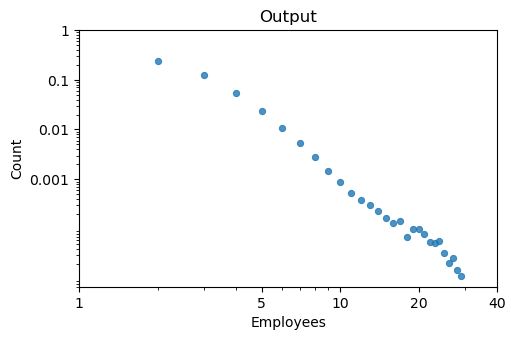

In [890]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
#ax.set_ylim([0,0.4])
#ax.set_xlim([0,100])
ax.set_title("Output")
ticks = (1,5,10,20, 40)
ticksy = (0.001, 0.01, 0.1, 1)
df_big.plot("Employees","Count",kind="scatter", ax=ax, linewidth=0.75, alpha=0.8, loglog=True)
ax.set_xticks(ticks=ticks)
ax.set_xticklabels(labels=ticks)
ax.set_yticks(ticks=ticksy)
ax.set_yticklabels(labels=ticksy)
plt.show()

Fit the firmsize power-law data

In [891]:
# Function to calculate the power-law with constants a and b
def power_law(x, b):
    return np.power(x, -(1+b), dtype=float)

In [892]:
def weibull(x, a, b):
    return 1-np.exp(-a*x**b, dtype=float)

def gld(x, a, b):
    return 1-(1+a*x/b)**((-1)/a)

In [893]:
from scipy.optimize import curve_fit

In [894]:
pars, cov = curve_fit(f=power_law, xdata= x_new, ydata=y_new, p0=0, bounds=(-np.inf, np.inf))

In [895]:
pars2, cov2 = curve_fit(f=weibull, xdata= x_new, ydata=y_new, p0=[0,0], bounds=(-np.inf, np.inf))

In [896]:
# not found optima
# pars3, cov3 = curve_fit(f=gld, xdata= x_new, ydata=y_new, p0=[0,0], bounds=(-np.inf, np.inf))

Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)

In [897]:
stdevs = np.sqrt(np.diag(cov))

In [898]:
stdevs2 = np.sqrt(np.diag(cov2))

Calculate the residuals

In [899]:
res = y_new - power_law(x_new, *pars)

In [900]:
ss_res = np.sum(res**2)

In [901]:
ss_res

0.0013713939622134847

In [902]:
ss_tot = np.sum((y_new-np.mean(y_new))**2)

In [903]:
ss_tot

0.06886861374950501

In [904]:
res2 = y_new - weibull(x_new, *pars2)

In [905]:
ss_res2 = np.sum(res2**2)

In [906]:
ss_tot2 = np.sum((y_new-np.mean(y_new))**2)

In [907]:
r_squared = 1-(ss_res/ss_tot)

In [908]:
r_squared

0.980086807508546

In [909]:
r_squared2 = 1-(ss_res2/ss_tot2)

In [910]:
r_squared2

0.9863599458561879

In [911]:
pars

array([1.07735622])

In [912]:
pars2

array([ 1.49790849, -2.40087656])

In [913]:
test = dist.loc[500, :]

In [914]:
test

number_employees
1     284
2     124
3      55
4      30
5      12
6       4
7       3
8       3
9       1
11      1
12      1
22      1
dtype: int64

In [915]:
frequency = test/test.sum()

In [916]:
freq_df = frequency.reset_index(inplace=False)

In [917]:
freq_df = freq_df.rename(columns={0:"Frequency"})

In [918]:
freq_df

,number_employees,Frequency
0,1,0.547206
1,2,0.238921
2,3,0.105973
3,4,0.057803
4,5,0.023121
5,6,0.007707
6,7,0.005780
7,8,0.005780
8,9,0.001927
9,11,0.001927


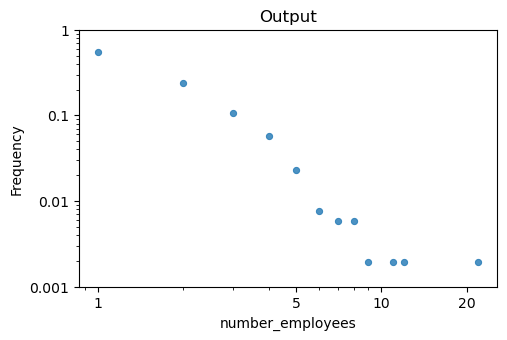

In [919]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
#ax.set_ylim([0,0.4])
#ax.set_xlim([0,100])
ax.set_title("Output")
ticks = (1,5,10,20)
ticksy = (0.001, 0.01, 0.1, 1)
freq_df.plot("number_employees","Frequency",kind="scatter", ax=ax, linewidth=0.75, alpha=0.8, loglog=True)
ax.set_xticks(ticks=ticks)
ax.set_xticklabels(labels=ticks)
ax.set_yticks(ticks=ticksy)
ax.set_yticklabels(labels=ticksy)
plt.show()

Overall Behavior of Agents, I (Population Cross-Section)

In [920]:
effort_dist = worker_dk[["t", "effort"]].compute()
dist_e = effort_dist.groupby(["t", "effort"]).size()

In [921]:
dist_e

t    effort  
0    0.000000    161
     0.000302      1
     0.001578      1
     0.003230      1
     0.005677      1
                ... 
999  0.998096      1
     0.998708      1
     0.998777      1
     0.999090      1
     0.999196      1
Length: 615929, dtype: int64

In [922]:
dfs_e = sample_dist(dist_e, 300, 30, 200)

df_e = reduce(lambda left, right: pd.merge(left, right, on=["effort"], how="outer"), dfs_e)
df_e['avg'] = df_e.iloc[:, 1:].mean(axis=1)
df_e = df_e.iloc[1:, :]
dfplot_e = df_e[["effort", "avg"]]
x_effort = df_e["effort"].values.tolist()
y_frequency_e = df3["avg"].values.tolist()

KeyError: 1020

In [923]:
y_frequency_e

NameError: name 'y_frequency_e' is not defined

NameError: name 'dfplot_e' is not defined

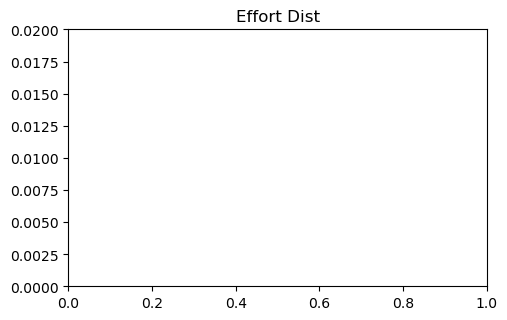

In [924]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,0.02])
ax.set_xlim([0,1])
ax.set_title("Effort Dist")
dfplot_e.plot("effort","avg",kind="scatter", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()